# docs examples

### load  

In [1]:
import sys, os 
import numpy as np 
from matplotlib import pyplot as plt 


# sys.path.append(os.path.join(os.getcwd(), '..'))

print(os.getcwd())
# importing the c4dynamics module:

# import c4dynamics as c4d 
# from c4dynamics.eqm import eqm3
# from numpy import fft
# import numpy.fft
import c4dynamics.eqm


d:\gh_repo\c4dynamics


# EQM

## eqm 3 

In [2]:
import c4dynamics as c4d 

pt = c4d.datapoint(mass = 10)
F = [0, 0, c4d.g_ms2]

c4d.eqm.eqm3(pt, F)


array([0.      , 0.      , 0.      , 0.      , 0.      , 0.980665])

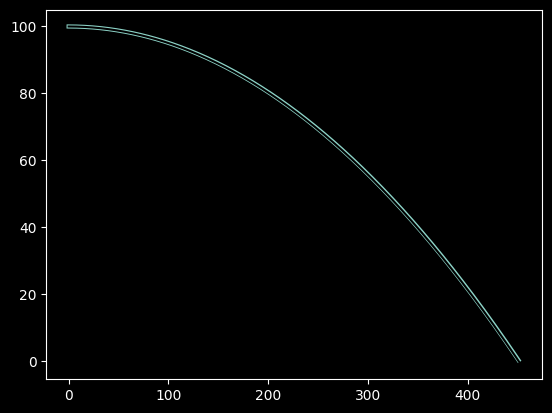

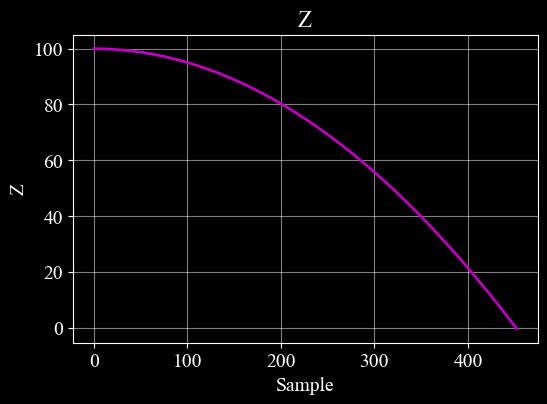

In [3]:
'''
Run the equations of motion of 
mass in a free fall:
'''

import c4dynamics as c4d
import numpy as np 
from matplotlib import pyplot as plt 


h0 = 100
pt = c4d.datapoint(z = h0)
dt = 1e-2
t = np.arange(0, 10, dt) #np.linspace(0, 10, 1000)

while pt.z > 0:
    dx = c4d.eqm.eqm3(pt, [0, 0, -c4d.g_ms2])
    pt.X = pt.X + dx * dt 
    pt.store()
    # print(pt.z)


# comapre to anayltic solution 
z = h0 - .5 * c4d.g_ms2 * t**2 

# z1 = pt.get_data('z')[:, np.newaxis]
# z2 = np.hstack((z[z >= 0], 0))[:, np.newaxis]
# z3 = np.concatenate((z1, z2), axis = 1)

plt.plot(z[z > 0], linewidth = 3)
plt.plot(pt.get_data('z'), 'k')

pt.draw('z')



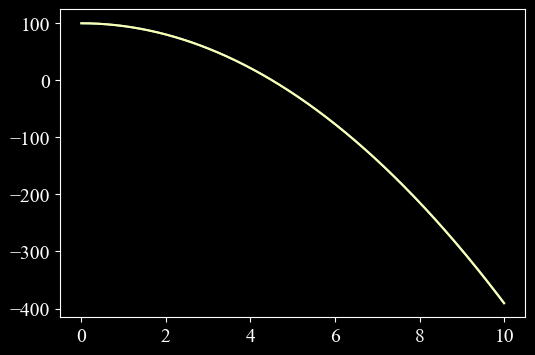

In [4]:
# test the integration 
import c4dynamics as c4d 

# analytic solution 
t = np.linspace(0, 10, 1000)
h0 = 100 # meter
v0 = 0

z = h0 + v0 * t - .5 * c4d.g_ms2 * t**2 

# integration 
pt = c4d.datapoint(z = h0)

for ti in t: 
    pt.inteqm([0, 0, -c4d.g_ms2], t[1] - t[0])
    pt.store(ti)

plt.plot(t, z)
plt.plot(pt.get_data('t'), pt.get_data('z'))



## eqm 6

In [5]:
import c4dynamics as c4d 
import numpy as np 

rb = c4d.rigidbody(iyy = 10)

F = np.zeros(3)
M = [0, -10, 0]

c4d.eqm.eqm6(rb, F, M)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.])

1.0.70


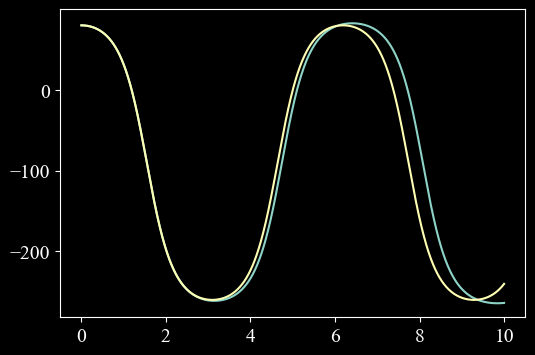

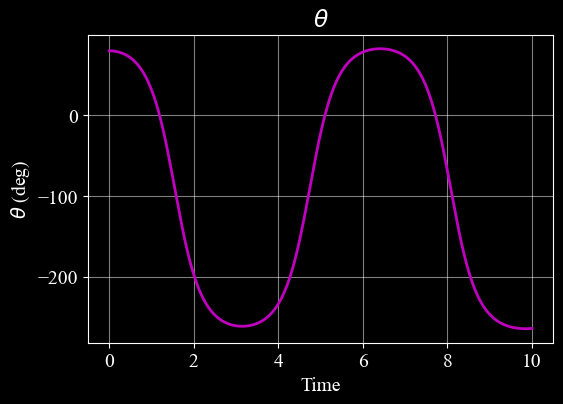

In [6]:
import c4dynamics as c4d 
from matplotlib import pyplot as plt 
import numpy as np 
import os 

print(c4d.__version__)

if 'rb' in locals(): 
    del rb
dt = .5e-3 

t = np.arange(0, 10, dt) # np.linspace(0, 10, 1000)
theta0 =  80 * c4d.d2r       # deg 
q0     =  0 * c4d.d2r        # deg to sec
Iyy    =  .4                  # kg * m^2 
length =  1                  # meter 
mass   =  0.5                # kg 
# theta = theta0 - Iyy / t 

# integration 
rb = c4d.rigidbody(theta = theta0, q = q0, iyy = Iyy, mass = mass)


for ti in t: 
    tau_g = -rb.mass * c4d.g_ms2 * length / 2 * c4d.cos(rb.theta)


    dx = c4d.eqm.eqm6(rb, np.zeros(3), [0, tau_g, 0])
    rb.X = rb.X + dx * dt 


    # print(rb.theta * c4d.r2d)
    # rb.inteqm(np.zeros(3), [0, tau_g, 0], dt)
    rb.store(ti)
    # print(rb.theta * c4d.r2d)

    # rb.store()
    # print(rb.z)    


fig = plt.subplots()
plt.plot(rb.get_data('t'), rb.get_data('theta') * c4d.r2d)



# analytic solution 
from scipy.integrate import odeint

def pend(y, t):
    theta, omega = y
    dydt = [omega, -rb.mass * c4d.g_ms2 * length / 2 * c4d.cos(theta) / Iyy]
    # print(dydt)
    return dydt

sol = odeint(pend, [theta0, q0], t)

# for i in range(len(t)):
#     print(str(t[i]) + '   ' + str(sol[i, 0] * c4d.r2d) + '    ' + str(rb.get_data('theta')[i] * c4d.r2d) + '   ' + str(np.abs(sol[i, 0] - rb.get_data('theta')[i]) * c4d.r2d)) 

plt.plot(t, sol[:, 0] * c4d.r2d)

# fig = plt.subplots()
# plt.plot(t, sol[:, 1] * c4d.r2d)
# plt.plot(rb.get_data('t'), rb.get_data('q') * c4d.r2d)

# rb.draw('phi')
rb.draw('theta')
# rb.draw('psi')
# rb.draw('x')
# rb.draw('y')
# rb.draw('z')


plt.savefig(os.path.join(os.getcwd()
            , 'docs/source/_static/figures/eqm6_theta.png')
                , dpi = 150
                    , bbox_inches = 'tight')



Text(0.5, 1.0, '$\\theta$')

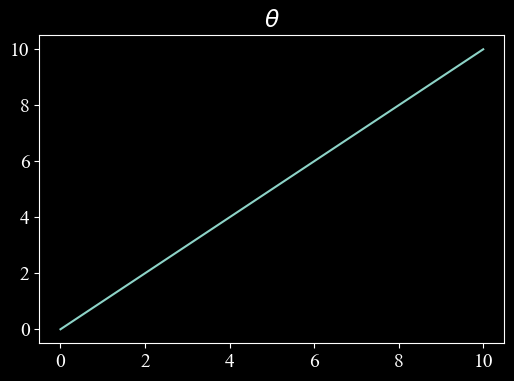

In [7]:
plt.plot(np.linspace(0, 10), np.linspace(0, 10))
plt.title('$\\theta$')


## int3

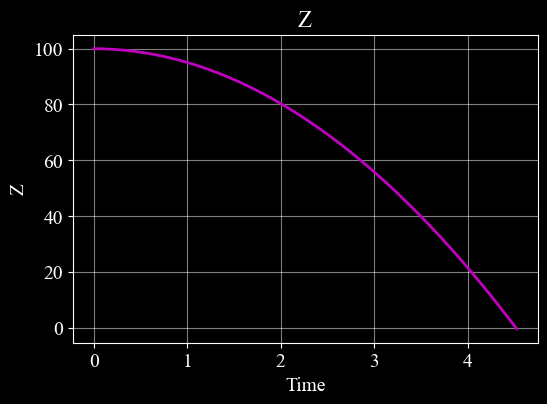

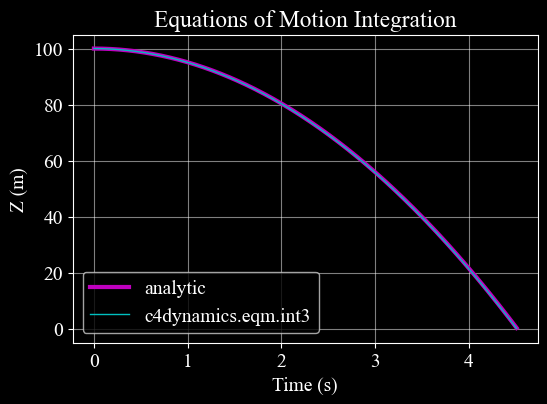

In [8]:
import c4dynamics as c4d
import numpy as np 
from matplotlib import pyplot as plt 
import os 


from c4dynamics.eqm import int3




'''
Run the equations of motion of 
mass in a free fall:
'''

h0 = 100
pt = c4d.datapoint(z = h0)
dt = 1e-2
t = np.arange(0, 10, dt) 
# previously we saw how to run free 
# fall with simple euler integration. let's make it with rk:

for ti in t:
    if pt.z < 0: break
    pt.X = int3(pt, [0, 0, -c4d.g_ms2], dt) 
    pt.store(ti)
    # print(pt.z)


pt.draw('z')

plt.savefig(os.path.join(os.getcwd()
            , 'docs/source/_static/figures/int3_z.png')
                , dpi = 150
                    , bbox_inches = 'tight')
#

# comapre to anayltic solution 
z = h0 - .5 * c4d.g_ms2 * t**2 

# z1 = pt.get_data('z')[:, np.newaxis]
# z2 = np.hstack((z[z >= 0], 0))[:, np.newaxis]
# z3 = np.concatenate((z1, z2), axis = 1)

fig = plt.subplots()
plt.plot(t[z > 0], z[z > 0], 'm', linewidth = 3, label = 'analytic')
# plt.plot(z[z > 0], linewidth = 3)
ptz = pt.get_data('z')
plt.plot(pt.get_data('t')[ptz > 0], ptz[ptz > 0], 'c', linewidth = 1, label = 'c4dynamics.eqm.int3')
# plt.plot(pt.get_data('z'), 'k')

plt.title('Equations of Motion Integration')
plt.xlabel('Time (s)')
plt.ylabel('Z (m)')
plt.grid(alpha = .5)
plt.legend(loc = 'lower left')


plt.savefig(os.path.join(os.getcwd()
            , 'docs/source/_static/figures/int3_vs_analytic.png')
                , dpi = 150
                    , bbox_inches = 'tight')

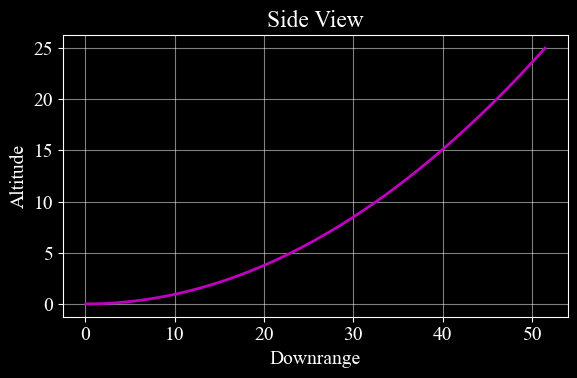

In [9]:
import c4dynamics as c4d
import numpy as np 
from matplotlib import pyplot as plt 
import os 


from c4dynamics.eqm import int3

'''

A Helium balloon of 100g floats with lift force of L = 0.05N
and expreiences a side wind of 10k.
g = 10m/s^2 
m = 1kg
F = ma = 10 kg*m/s^2 
a = 0.5m/s^2 
m = .1kg 
F = .5 * .1 = .05 kg*m/s^2 
'''
# 
t1, t2, dt = 0, 10, 0.01
F = [0, 0, .05]

hballoon = c4d.datapoint(mass = 0.1, vx = 10 * c4d.k2ms)

for t in np.arange(t1, t2, dt):
    hballoon.X = int3(hballoon, F, dt)
    hballoon.store(t)

hballoon.draw('side')
plt.gca().invert_yaxis()


plt.tight_layout()
plt.savefig(os.path.join(os.getcwd()
              , 'docs/source/_static/figures/inteqm3.png')
                , dpi = 150)
                    # , bbox_inches = 'tight'
plt.show()


## int6

1.0.70


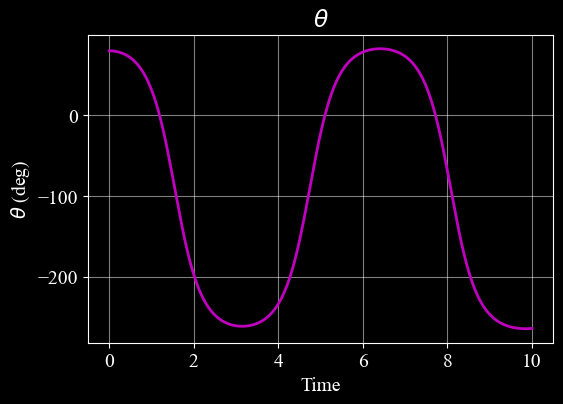

In [10]:
import c4dynamics as c4d 
from matplotlib import pyplot as plt 
import numpy as np 
import os 



print(c4d.__version__)

if 'rb' in locals(): 
    del rb

dt = .5e-3 

t = np.arange(0, 10, dt) # np.linspace(0, 10, 1000)

theta0 =  80 * c4d.d2r       # deg 
q0     =  0 * c4d.d2r        # deg to sec
Iyy    =  .4                  # kg * m^2 
length =  1                  # meter 
mass   =  0.5                # kg 
# theta = theta0 - Iyy / t 

# integration 
rb = c4d.rigidbody(theta = theta0, q = q0, iyy = Iyy, mass = mass)


for ti in t: 
    tau_g = -rb.mass * c4d.g_ms2 * length / 2 * c4d.cos(rb.theta)


    rb.X = c4d.eqm.int6(rb, np.zeros(3), [0, tau_g, 0], dt)
     

    # print(rb.theta * c4d.r2d)
    # rb.inteqm(np.zeros(3), [0, tau_g, 0], dt)
    rb.store(ti)
    # print(rb.theta * c4d.r2d)

    # rb.store()
    # print(rb.z) 
    # 
       
rb.draw('theta')
# rb.draw('psi')
# rb.draw('x')
# rb.draw('y')
# rb.draw('z')


plt.savefig(os.path.join(os.getcwd()
            , 'docs/source/_static/figures/eqm6_theta.png')
                , dpi = 150
                    , bbox_inches = 'tight')



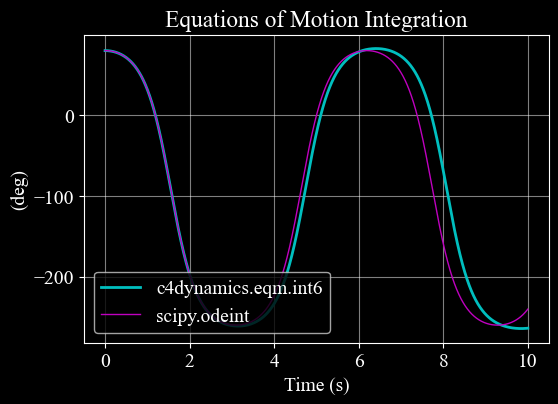

In [11]:
''' compare to scipyt odeint '''

fig = plt.subplots()
plt.plot(rb.get_data('t'), rb.get_data('theta') * c4d.r2d, 'c', linewidth = 2, label = 'c4dynamics.eqm.int6')



from scipy.integrate import odeint

def pend(y, t):
    theta, omega = y
    dydt = [omega, -rb.mass * c4d.g_ms2 * length / 2 * c4d.cos(theta) / Iyy]
    # print(dydt)
    return dydt

sol = odeint(pend, [theta0, q0], t)


plt.plot(t, sol[:, 0] * c4d.r2d, 'm', linewidth = 1, label = 'scipy.odeint')
plt.title('Equations of Motion Integration')
plt.xlabel('Time (s)')
plt.ylabel('(deg)')
plt.grid(alpha = .5)
plt.legend(loc = 'lower left')

# fig = plt.subplots()
# plt.plot(t, sol[:, 1] * c4d.r2d)
# plt.plot(rb.get_data('t'), rb.get_data('q') * c4d.r2d)

# rb.draw('phi')


plt.savefig(os.path.join(os.getcwd()
            , 'docs/source/_static/figures/int6_scipy_vs_c4d.png')
                , dpi = 150
                    , bbox_inches = 'tight')

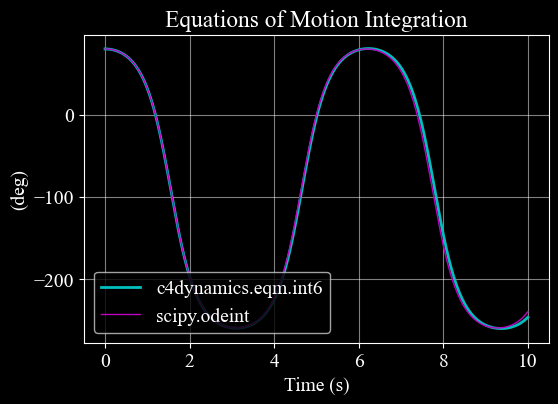

In [12]:
''' compare to scipyt odeint - very small step size '''

dt = .1e-3 

t = np.arange(0, 10, dt) # np.linspace(0, 10, 1000)

theta0 =  80 * c4d.d2r       # deg 
q0     =  0 * c4d.d2r        # deg to sec
Iyy    =  .4                  # kg * m^2 
length =  1                  # meter 
mass   =  0.5                # kg 
# theta = theta0 - Iyy / t 

# integration 
rb = c4d.rigidbody(theta = theta0, q = q0, iyy = Iyy, mass = mass)

for ti in t: 
    tau_g = -rb.mass * c4d.g_ms2 * length / 2 * c4d.cos(rb.theta)
    rb.X = c4d.eqm.int6(rb, np.zeros(3), [0, tau_g, 0], dt)
    rb.store(ti)
       

sol = odeint(pend, [theta0, q0], t)


fig = plt.subplots()
plt.plot(rb.get_data('t'), rb.get_data('theta') * c4d.r2d, 'c', linewidth = 2, label = 'c4dynamics.eqm.int6')
plt.plot(t, sol[:, 0] * c4d.r2d, 'm', linewidth = 1, label = 'scipy.odeint')

plt.title('Equations of Motion Integration')
plt.xlabel('Time (s)')
plt.ylabel('(deg)')
plt.grid(alpha = .5)
plt.legend(loc = 'lower left')


plt.savefig(os.path.join(os.getcwd()
            , 'docs/source/_static/figures/int6_scipy_vs_c4d_dt001.png')
                , dpi = 150
                    , bbox_inches = 'tight')

# ROTMAT

## rotx

In [13]:
import c4dynamics as c4d
from c4dynamics.rotmat import rotx
# import numpy as np

rotx(0)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0., -0.,  1.]])

In [14]:
import c4dynamics as c4d
from c4dynamics.rotmat import rotx
# import numpy as np

R = rotx(c4d.pi / 2)
print(R.round(decimals = 3))

[[ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0. -1.  0.]]


In [15]:
import c4dynamics as c4d
from c4dynamics.rotmat import rotx
import numpy as np


v1 = [0, 0, 1]
print(v1)

phi = 90 * c4d.d2r
v2 = rotx(phi) @ v1
print(v2.round(decimals = 3))

phi = 45 * c4d.d2r
v2 = rotx(phi) @ v1
print(v2.round(decimals = 3))



[0, 0, 1]
[0. 1. 0.]
[0.    0.707 0.707]


## roty

In [16]:
import c4dynamics as c4d
from c4dynamics.rotmat import roty
# import numpy as np

roty(0)

array([[ 1.,  0., -0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [17]:
import c4dynamics as c4d
from c4dynamics.rotmat import roty

R = roty(c4d.pi / 2)
print(R.round(decimals = 3))

[[ 0.  0. -1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]]


In [18]:
import c4dynamics as c4d
from c4dynamics.rotmat import roty
import numpy as np


v1 = [0, 0, 1]
print(v1)

phi = 90 * c4d.d2r
v2 = roty(phi) @ v1
print(v2.round(decimals = 3))

phi = 45 * c4d.d2r
v2 = roty(phi) @ v1
print(v2.round(decimals = 3))



[0, 0, 1]
[-1.  0.  0.]
[-0.707  0.     0.707]


## rotz

In [19]:
import c4dynamics as c4d
from c4dynamics.rotmat import rotz
# import numpy as np

rotz(0)

array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [20]:
import c4dynamics as c4d
from c4dynamics.rotmat import rotz

R = rotz(c4d.pi / 2)
print(R.round(decimals = 3))

[[ 0.  1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]


In [21]:
import c4dynamics as c4d
from c4dynamics.rotmat import rotz
import numpy as np


v1 = [0.707, 0.707, 0]
print(v1)

phi = 90 * c4d.d2r
v2 = rotz(phi) @ v1
print(v2.round(decimals = 3))

phi = 45 * c4d.d2r
v2 = rotz(phi) @ v1
print(v2.round(decimals = 3))



[0.707, 0.707, 0]
[ 0.707 -0.707  0.   ]
[1. 0. 0.]


## dcm321

In [22]:
import c4dynamics as c4d
from c4dynamics.rotmat import dcm321
import numpy as np

# its inertial velocity vector is expressed in the inertial earth frame by:
v = [150, 0, 0]
# the attitude of an aircraft with respect to inerital erath frame 
# is given by: 
rb = c4d.rigidbody(phi = 0, theta = 30 * c4d.d2r, psi = 0) 
# the velcoty expressed in body frame is given by:
vb = rb.BI @ v
print(vb.round(decimals = 3))


[129.904   0.     75.   ]


## dcm321euler

In [23]:
import c4dynamics as c4d
from c4dynamics.rotmat import dcm321euler
import numpy as np

print(dcm321euler(np.eye(3)))
print(dcm321euler(np.array([[1, 0, 0], [0, 0, -1], [0, 1, 0]])))


(0.0, -0.0, 0.0)
(-90.0, -0.0, 0.0)


In [24]:
import c4dynamics as c4d
from c4dynamics.rotmat import dcm321euler, dcm321
import numpy as np

# A rotation matrix that represents the attitude of an with respect to 
# an inertial earth frame is given by:

BI = np.array([[ 0.8660254,  0, -0.5      ]
                , [ 0,         1,  0.       ]
                , [ 0.5,       0,  0.8660254]])
print(BI)

print(dcm321euler(BI))

[[ 0.8660254  0.        -0.5      ]
 [ 0.         1.         0.       ]
 [ 0.5        0.         0.8660254]]
(0.0, 30.000000000000004, 0.0)


# datapoint

(1000.0, 4500.0)

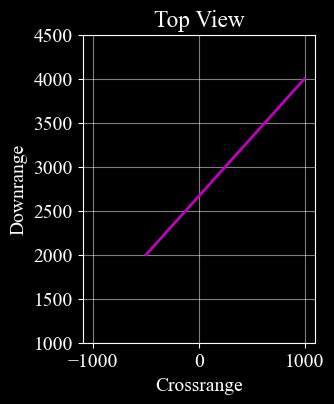

In [25]:
#   Simulate the flight of an aircraft starting with some given
#   initial conditions and draw trajectories: 
import c4dynamics as c4d
import numpy as np 
from matplotlib import pyplot as plt 


target = c4d.datapoint(x = 4000, y = 1000, z = -3000, vx = -200, vy = -150)    

dt = 0.01 
time = np.arange(0, 10, dt)

for t in time: 
    target.inteqm(np.zeros(3), dt = dt)
    target.store(t)

target.draw('top')
fig = plt.gcf()
fig.set_size_inches(3.0, 4.0)

ax = plt.gca()
ax.set_xlim(-1100, 1100)
ax.set_ylim(1000, 4500)

## Datapoint Attributes

## X

In [26]:
import c4dynamics as c4d
import numpy as np 


pt = c4d.datapoint()

print(pt.X)
# ...
#       x     y    z  vx vy vz 
pt.X = [1000, 100, 0, 0, 0, -100] 
print(pt.X)


# define rigidbody object 
rb = c4d.rigidbody(theta = 5 * c4d.d2r)

# print its state variables
print('get the rigidbody state:')
print(rb.X)
# ...

# update only the translational variables 
#       x     y    z  vx vy vz 
rb.X = [1000, 100, 0, 0, 0, -100] 
print('  '.join([f'{x}' for x in rb.X]))

# setting partial state, which is not the first indices is possilbe by concatinating it with the first variables
# set only the angular variables
Xangular = np.array([5, -10, 0, 1, -1, 0]) * c4d.d2r 
rb.X = np.concatenate((rb.X[:6], Xangular))
print(rb.X[:6])
print('  '.join([f'{x * c4d.r2d}' for x in rb.X[6:]]))




[0 0 0 0 0 0]
[1000  100    0    0    0 -100]
get the rigidbody state:
[0.         0.         0.         0.         0.         0.
 0.         0.08726646 0.         0.         0.         0.        ]
1000.0  100.0  0.0  0.0  0.0  -100.0  0.0  0.08726646259971647  0.0  0.0  0.0  0.0
[1000.  100.    0.    0.    0. -100.]
5.0  -10.0  0.0  1.0  -1.0  0.0


## X0

In [27]:
import c4dynamics as c4d
import numpy as np 


pt = c4d.datapoint(x = 1000, vx = -200)

print('pt initial conditions:')
print(pt.X0)
# ...
#       x     y    z  vx vy vz 

# chagne the params:
pt.X = [500, 500, 0, 0, 0, 0]
# check again the x0:
print(pt.X)
print(pt.X0)

print('rigidbody')
# define rigidbody object 
rb = c4d.rigidbody(theta = 5 * c4d.d2r)

# print its state variables
print('rb initial codnitions:')
print(rb.X0 * c4d.r2d)
# ...





pt initial conditions:
[1000    0    0 -200    0    0]
[500 500   0   0   0   0]
[1000    0    0 -200    0    0]
rigidbody
rb initial codnitions:
[0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0.]


## pos

In [28]:
import c4dynamics as c4d
import numpy as np 


pt = c4d.datapoint(x = 1000, y = -20, vx = -200)

print(pt.pos)

[1000  -20    0]


## vel

In [29]:
import c4dynamics as c4d
import numpy as np 


pt = c4d.datapoint(x = 1000, y = -20, vx = -200)

print(pt.vel)

[-200    0    0]


## store 

In [30]:
# store trajecotires of mass in a free fall:

import c4dynamics as c4d
import numpy as np 
from matplotlib import pyplot as plt 


pt = c4d.datapoint()

for i in range(3):
    pt.X = np.random.randint(1, 100, 6)
    pt.store()
    print(pt.X)

for x in pt.get_data():
    print(x[1:])




# Store trajectories of a free fall mass: 

t = 0
# t = np.linspace(0, 10, 1000)
dt = 1e-3
h0 = 100 # meter

pt = c4d.datapoint(z = h0)
# pt = c4d.datapoint(z = h0)

# for ti in t: 
while pt.z >= 0: 
    pt.inteqm([0, 0, -c4d.g_ms2], dt)
    t += dt
    pt.store(t)

for z in pt.get_data('z'):
    print(z)
# pt.draw('z')



# z = h0 - .5 * c4d.g_ms2 * t**2 


# pt.store(ti)

# plt.plot(t, z)
# plt.plot(pt.get_data('t'), pt.get_data('z'))




[52 24 96 64 68 82]
[ 7 12 65 97 60 37]
[47 91 22 22 30 11]
[52 24 96 64 68 82]
[ 7 12 65 97 60 37]
[47 91 22 22 30 11]


## storevar

In [ ]:
import c4dynamics as c4d
import numpy as np 

# the morphospectra extends the datapoint class to include also a dimension
# state. 
# the X.setter overrides the super X.setter to update the dimension with 
# respect to the input coordinates. 
class morphospectra(c4d.datapoint):
    def __init__(self): 
        super().__init__()  
        self.dim = 0
        
    @c4d.datapoint.X.setter
    def X(self, x):

        # override X.setter mechanism
        for i, k in enumerate(self._didx.keys()):
            if k == 't': continue
            if i > len(x): break 
            setattr(self, k, x[i - 1])
            
        # update current dimension 
        if x[2] != 0:
            # z or vz 
            self.dim = 3
            return None 
        if x[1] != 0:
            # y or vy
            self.dim = 2
            return None
        if x[0] != 0:
            self.dim = 1

spec = morphospectra()

for r in range(10):
    spec.X = np.random.choice([0, 1], 3)
    spec.store()
    spec.storevar('dim')


print('x y z  | dim')
print('------------')
for x, dim in zip(spec.get_data()[:, 1 : 4].tolist(), spec.get_data('dim')[:, 1:].tolist()):
    # print(*x + ' | ' + str(dim)) 
    # s = x + [' | '] + dim
    print(*(x + [' | '] + dim)) 


x y z  | dim
------------
0 1 0  |  2
0 1 1  |  3
1 0 0  |  1
0 0 0  |  1
1 1 0  |  2
0 0 1  |  3
1 0 1  |  3
0 1 0  |  2
1 0 1  |  3
1 0 0  |  1


## get_data

In [ ]:
import c4dynamics as c4d
import numpy as np 

# the morphospectra extends the datapoint class to include also a dimension
# state. 
# the X.setter overrides the super X.setter to update the dimension with 
# respect to the input coordinates. 
class morphospectra(c4d.datapoint):
    def __init__(self): 
        super().__init__()  
        self.dim = 0
        
    @c4d.datapoint.X.setter
    def X(self, x):

        # override X.setter mechanism
        for i, k in enumerate(self._didx.keys()):
            if k == 't': continue
            if i > len(x): break 
            setattr(self, k, x[i - 1])
            
        # update current dimension 
        if x[2] != 0:
            # z or vz 
            self.dim = 3
            return None 
        if x[1] != 0:
            # y or vy
            self.dim = 2
            return None
        if x[0] != 0:
            self.dim = 1

spec = morphospectra()

for r in range(10):
    spec.X = np.random.choice([0, 1], 3)
    spec.store()
    spec.storevar('dim')


# get the data of the user-defined 'dim' variable: 
dim_history = spec.get_data('dim')[:, 1:]

print('x y z  | dim')
print('------------')
for x, dim in zip(spec.get_data()[:, 1 : 4].tolist(), dim_history.tolist()):
    # print(*x + ' | ' + str(dim)) 
    # s = x + [' | '] + dim
    print(*(x + [' | '] + dim)) 


x y z  | dim
------------
0 0 0  |  0
1 0 0  |  1
0 0 0  |  1
0 1 1  |  3
0 1 1  |  3
0 1 1  |  3
1 1 0  |  2
0 0 1  |  3
1 1 1  |  3
0 1 0  |  2


## statetime

In [ ]:
import c4dynamics as c4d
import numpy as np 


pt = c4d.datapoint()

time = np.linspace(-2, 3, 1000)

for t in time: 
  pt.X = np.random.randint(1, 100, 6)
  pt.store(t)

print(pt.timestate(0))

[48, 24, 32, 77, 13, 89]


## P 

In [ ]:
import c4dynamics as c4d
import numpy as np 


pt = c4d.datapoint(x = 7, y = 24)
print(pt.P())
pt.X = np.zeros(6)
print(pt.P())


25.0
0.0


## V

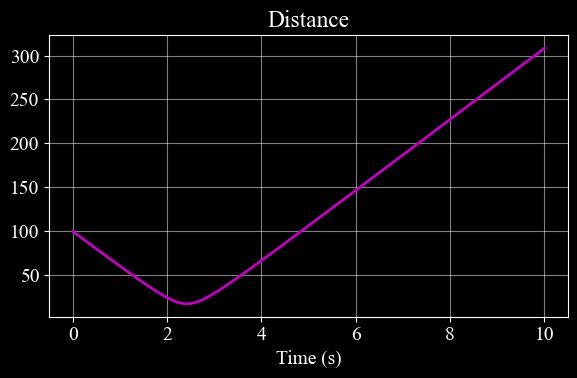

In [ ]:
import c4dynamics as c4d
import numpy as np 
from matplotlib import pyplot as plt 
import os 

plt.rcParams['figure.figsize'] = (6.0, 4.0) # set default size of plots
# plt.rcParams['image.cmap'] = 'gray'
plt.rcParams["font.size"] = 14
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams["font.family"] = "Times New Roman"   # "Britannic Bold" # "Modern Love"#  "Corbel Bold"# 
plt.style.use('dark_background')  # 'default' # 'seaborn' # 'fivethirtyeight' # 'classic' # 'bmh'
    
camera = c4d.datapoint()
car = c4d.datapoint(x = -100, vx = 40, vy = -7)
dist = []
time = np.linspace(0, 10, 1000)
for t in time:
  car.inteqm(np.zeros(3), time[1] - time[0])
  dist.append(camera.dist(car))

plt.plot(time, dist, 'm', linewidth = 2)


plt.title('Distance')
plt.xlabel('Time (s)')
plt.grid(alpha = 0.5)
#

plt.tight_layout()
plt.savefig(os.path.join(os.getcwd()
              , 'docs/source/_static/figures/distance.png')
                , dpi = 150)
                    # , bbox_inches = 'tight'
plt.show()



## inteqm

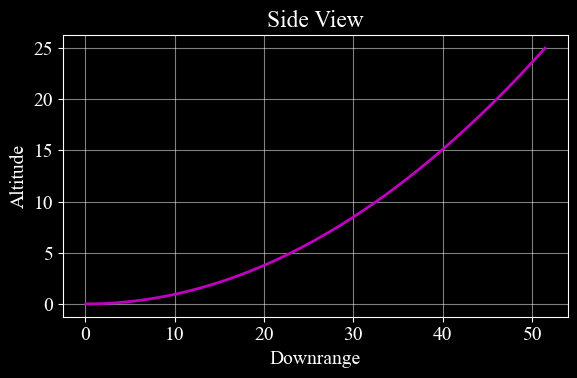

In [ ]:
# datapoint

import c4dynamics as c4d 
import numpy as np 
from matplotlib import pyplot as plt 
import os 

# A Helium balloon of 100g floats with lift force of L = 0.05N
# and expreiences a side wind of 10k.
# g = 10m/s^2 
# m = 1kg
# F = ma = 10 kg*m/s^2 
# a = 0.5m/s^2 
# m = .1kg 
# F = .5 * .1 = .05 kg*m/s^2 

# 
t1, t2, dt = 0, 10, 0.01
F = [0, 0, .05]

hballoon = c4d.datapoint(mass = 0.1, vx = 10 * c4d.k2ms)

for t in np.arange(t1, t2, dt):
    hballoon.inteqm(F, dt)
    hballoon.store(t)

hballoon.draw('side')
plt.gca().invert_yaxis()


plt.tight_layout()
plt.savefig(os.path.join(os.getcwd()
              , 'docs/source/_static/figures/inteqm3.png')
                , dpi = 150)
                    # , bbox_inches = 'tight'
plt.show()


## draw

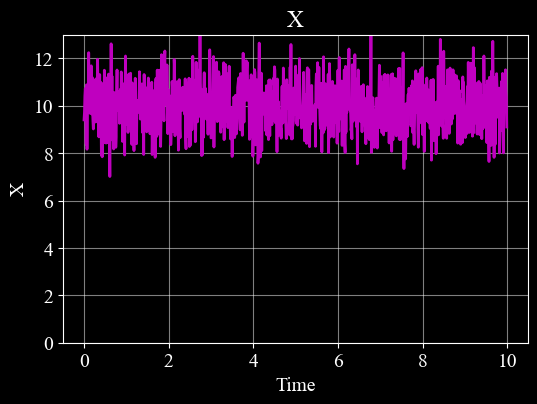

In [ ]:
import c4dynamics as c4d 
import numpy as np 


pt = c4d.datapoint()


for t in np.arange(0, 10, .01):
  pt.x = 10 + np.random.randn()
  pt.store(t)

pt.draw('x')
plt.gca().set_ylim(0, 13)

plt.savefig(os.path.join(os.getcwd()
              , 'docs/source/_static/figures/draw_x.png')
                , dpi = 150)
                    # , bbox_inches = 'tight'


# rigidbody 

## angles


In [ ]:
import c4dynamics as c4d
import numpy as np 


rb = c4d.rigidbody(phi = 135 * c4d.d2r)

print(rb.angles * c4d.r2d)

[135.   0.   0.]


## ang_rates

In [ ]:
import c4dynamics as c4d
import numpy as np 

q0 = 30 * c4d.d2r

rb = c4d.rigidbody(q = q0)

print(rb.ang_rates * c4d.r2d)


[ 0. 30.  0.]


## IB

In [ ]:
print(np.cos(30 * c4d.d2r))
print(np.sin(30 * c4d.d2r))

0.8660254037844387
0.49999999999999994


In [ ]:
import c4dynamics as c4d 
import numpy as np 


v_body = [np.sqrt(3), 0, 1]

rb = c4d.rigidbody(theta = 30 * c4d.d2r)

v_inertial = rb.IB @ v_body

print(v_inertial.round(decimals = 2))

[2. 0. 0.]


## BI

In [ ]:
import c4dynamics as c4d 
import numpy as np 


v_inertial = [1, 0, 0]

rb = c4d.rigidbody(psi = 45 * c4d.d2r)

v_body = rb.BI @ v_inertial 

print(v_body.round(decimals = 3))

[ 0.707 -0.707  0.   ]


## inteqm

1.0.50


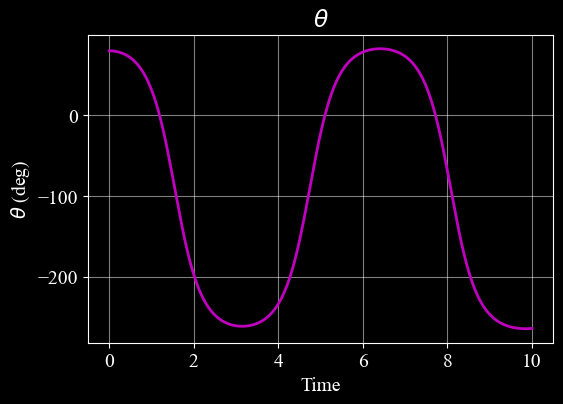

In [ ]:
import c4dynamics as c4d 
from matplotlib import pyplot as plt 
import numpy as np 
import os 



print(c4d.__version__)

if 'rb' in locals(): 
    del rb

dt = .5e-3 

t = np.arange(0, 10, dt) # np.linspace(0, 10, 1000)

theta0 =  80 * c4d.d2r       # deg 
q0     =  0 * c4d.d2r        # deg to sec
Iyy    =  .4                  # kg * m^2 
length =  1                  # meter 
mass   =  0.5                # kg 
# theta = theta0 - Iyy / t 

# integration 
rb = c4d.rigidbody(theta = theta0, q = q0, iyy = Iyy, mass = mass)


for ti in t: 
    tau_g = -rb.mass * c4d.g_ms2 * length / 2 * c4d.cos(rb.theta)


    rb.X = c4d.eqm.int6(rb, np.zeros(3), [0, tau_g, 0], dt)
     

    # print(rb.theta * c4d.r2d)
    # rb.inteqm(np.zeros(3), [0, tau_g, 0], dt)
    rb.store(ti)
    # print(rb.theta * c4d.r2d)

    # rb.store()
    # print(rb.z) 
    # 
       
rb.draw('theta')
# rb.draw('psi')
# rb.draw('x')
# rb.draw('y')
# rb.draw('z')


plt.savefig(os.path.join(os.getcwd()
            , 'docs/source/_static/figures/eqm6_theta.png')
                , dpi = 150
                    , bbox_inches = 'tight')



# sensors

## seeker

## constructor 

In [ ]:
import c4dynamics as c4d
from c4dynamics.sensors import seeker

pt = c4d.datapoint()
rb = c4d.rigidbody(z = 30, theta = -1 * c4d.d2r)
skr = seeker(origin = rb, isideal = True)


methods = [attr for attr in dir(seeker) if callable(getattr(seeker, attr))]

# Print the list of methods
# print(methods)

print(skr.measure(c4d.datapoint(), store = False))
print(skr.bias)


(3.138279124093834, -1.553577835764382, 30.0)
0.0


## target 

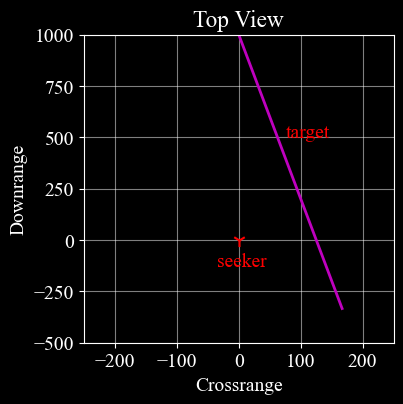

In [2]:
import c4dynamics as c4d
import numpy as np  
# import cProfile 
import os 

from matplotlib import pyplot as plt 
from matplotlib.transforms import Bbox


from c4dynamics.sensors import seeker 
from c4dynamics.utils.tictoc import * 



''' generate target trajectory '''


tgt = c4d.datapoint(x = 1000, y = 0, vx = -80 * c4d.kmh2ms, vy = 10 * c4d.kmh2ms)
for t in np.arange(0, 60, 0.01):
    tgt.inteqm(np.zeros(3), .01)
    tgt.store(t)




tgt.draw('top')

fig = plt.gcf()
fig.set_size_inches(4.0, 4.0)

ax = plt.gca()
ax.set_xlim(-250, 250)
ax.set_ylim(-500, 1000)

# ax.grid(False)

ax.scatter(0, 0, color = 'red', marker = '1', s = 90, zorder = 2)
ax.text(-35, -150, 'seeker', color = 'red', fontsize = 14, verticalalignment = 'bottom')
ax.text(75, 500, 'target', color = 'red', fontsize = 14)

# plt.tight_layout(rect = (0, 0, 0.5, 1))

# axes_width = .6  
# axes_position = ax.get_position()
# # new_position = [axes_position.x0, axes_position.y0, axes_width, axes_position.height]

# # ax.set_position(new_position)
# new_position = Bbox([axes_position.x0, axes_position.y0, axes_width, axes_position.height])

# # Set the new position
# ax.set_axes_locator(new_position)

plt.savefig(os.path.join(os.getcwd()
                , 'docs/source/_static/figures/seeker_target.png')
                    , dpi = 150
                        , bbox_inches = 'tight')



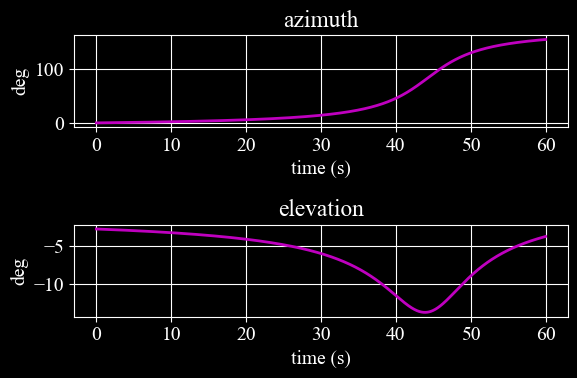

In [3]:
''' ideal seeker '''
import c4dynamics as c4d 
import numpy as np 
from matplotlib import pyplot as plt 


# seeker position and attitude
skr = c4d.sensors.seeker(origin = c4d.rigidbody(z = 30, theta = -1 * c4d.d2r), isideal = True)
# measure the target position
truth_angles = []


# def truthangles():
for x in tgt.get_data():
    truth_angles.append(skr.measure(c4d.create(x[1:]))[:2])

# return truth_angles

# cProfile.run('truthangles()')
fig, axs = plt.subplots(2)

axs[0].plot(tgt.get_data('t'), [x[0] * c4d.r2d for x in truth_angles], 'm', linewidth = 2)
axs[0].set_title('azimuth')
axs[0].set_xlabel('time (s)')
axs[0].set_ylabel('deg')
axs[0].grid()
# axs[0].set_ylim(-1, 3)

axs[1].plot(tgt.get_data('t'), [x[1] * c4d.r2d for x in truth_angles], 'm', linewidth = 2)
axs[1].set_title('elevation')
axs[1].set_xlabel('time (s)')
axs[1].set_ylabel('deg')
axs[1].grid()
# axs[1].set_ylim(-1, 1)

plt.tight_layout()
plt.savefig(os.path.join(os.getcwd()
              , 'docs/source/_static/figures/ideal_seeker.png')
                , dpi = 150)
                    # , bbox_inches = 'tight'
plt.show()



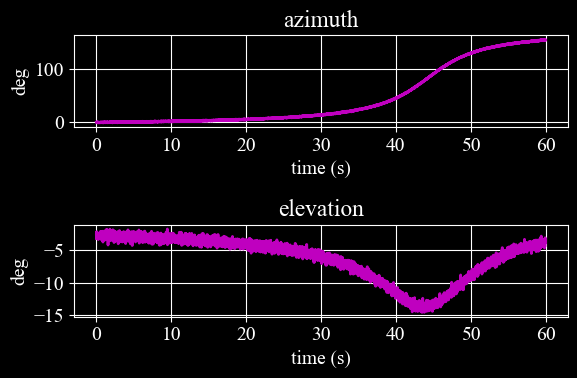

In [ ]:
''' nonideal seeker '''

    
skr = c4d.sensors.seeker(origin = c4d.rigidbody(z = 30, theta = -1 * c4d.d2r))
# measure the target position
measured_angles = []

for x in tgt.get_data():
    measured_angles.append(skr.measure(c4d.create(x[1:]))[:2])


In [ ]:
print('{:<13}'.format('Bias'), f'{skr.bias * c4d.r2d:.2f}', 'deg \n'
        '{:<13}'.format('Scale factor'), f'{skr.scale_factor:.2f}', '\n'
          '{:<13}'.format('Noise'), f'{skr.noise_std:.2f}', 'deg (1 sigma)')


Bias          -0.11 deg 
Scale factor  0.85 
Noise         0.01 deg (1 sigma)


In [ ]:
print(f'{ skr.bias * c4d.r2d :.2f}')
print(f'{ skr.scale_factor :.2f}')
print(f'{ skr.noise_std :.2f}')

-0.11
0.85
0.01


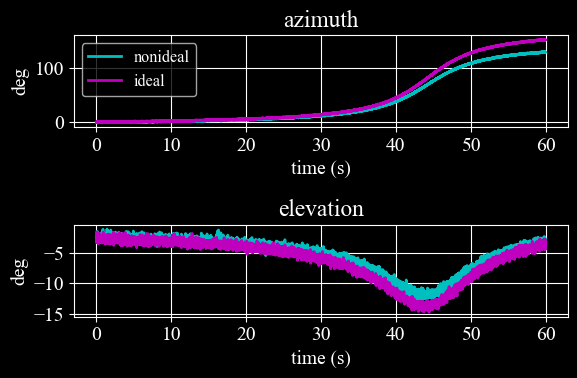

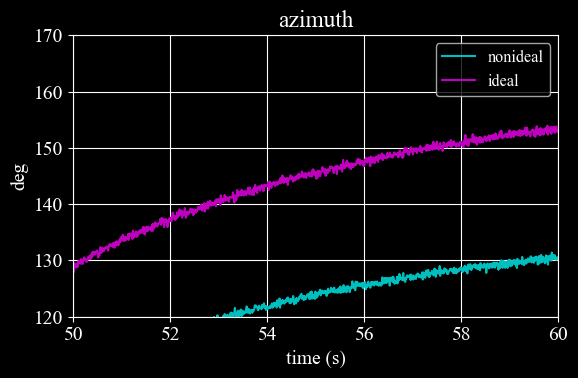

In [ ]:
fig, axs = plt.subplots(2)
axs[0].plot(tgt.get_data('t'), [x[0] * c4d.r2d for x in measured_angles], 'c', linewidth = 2, label = 'nonideal')
axs[0].plot(tgt.get_data('t'), [x[0] * c4d.r2d for x in truth_angles], 'm', linewidth = 2, label = 'ideal')
axs[0].set_title('azimuth')
axs[0].set_xlabel('time (s)')
axs[0].set_ylabel('deg')
axs[0].grid()
axs[0].legend(fontsize = 'small')
# axs[0].set_ylim(-1, 3)

axs[1].plot(tgt.get_data('t'), [x[1] * c4d.r2d for x in measured_angles], 'c', linewidth = 2)
axs[1].plot(tgt.get_data('t'), [x[1] * c4d.r2d for x in truth_angles], 'm', linewidth = 2)
axs[1].set_title('elevation')
axs[1].set_xlabel('time (s)')
axs[1].set_ylabel('deg')
axs[1].grid()
# axs[1].set_ylim(-1, 1)

plt.tight_layout()
plt.savefig(os.path.join(os.getcwd()
              , 'docs/source/_static/figures/nonideal_seeker.png')
                , dpi = 150
                    , bbox_inches = 'tight')

plt.show()


''' zoom in azimuth '''

_, ax = plt.subplots()
ax.plot(tgt.get_data('t'), [x[0] * c4d.r2d for x in measured_angles], 'c', label = 'nonideal')
ax.plot(tgt.get_data('t'), [x[0] * c4d.r2d for x in truth_angles], 'm', label = 'ideal')
ax.set_title('azimuth')
ax.set_xlabel('time (s)')
ax.set_ylabel('deg')
ax.grid()
ax.legend(fontsize = 'small')
ax.set_xlim(50, 60)
ax.set_ylim(120, 170)

plt.tight_layout()
plt.savefig(os.path.join(os.getcwd()
              , 'docs/source/_static/figures/nonideal_seeker_zoom.png')
                , dpi = 150
                    , bbox_inches = 'tight')

plt.show()




0


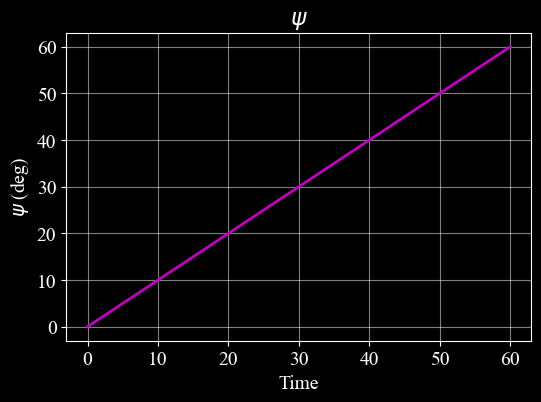

In [ ]:
''' yawing seeker '''
    
skr = c4d.sensors.seeker(origin = c4d.rigidbody(z = 30, theta = -1 * c4d.d2r))
print(len(skr._data))

measured_angles_2 = []

for x in tgt.get_data():
    skr.psi += .01 * c4d.d2r 
    measured_angles_2.append(skr.measure(c4d.create(x[1:]), store = True, t = x[0])[:2])
    skr.store(x[0])

skr.draw('psi')



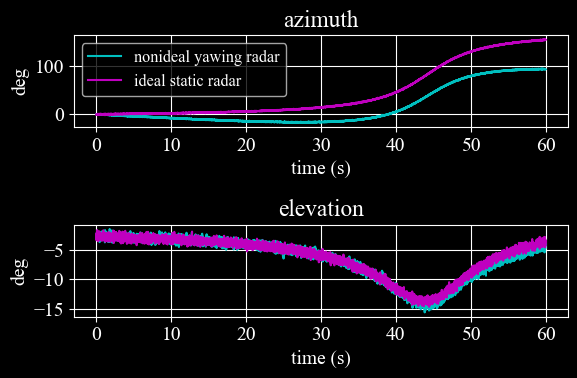

In [ ]:
from matplotlib.widgets import Cursor, Button


fig, axs = plt.subplots(2)
fsize = fig.get_size_inches()
# fig.set_size_inches((fsize[0], fsize[1] * 2))

axs[0].plot(tgt.get_data('t'), [x[0] * c4d.r2d for x in measured_angles_2], 'c', label = 'nonideal yawing radar')
axs[0].plot(tgt.get_data('t'), [x[0] * c4d.r2d for x in truth_angles], 'm', label = 'ideal static radar')
axs[0].set_title('azimuth')
axs[0].set_xlabel('time (s)')
axs[0].set_ylabel('deg')
axs[0].grid()
axs[0].legend(fontsize = 'small')
# axs[0].set_ylim(-1, 3)

axs[1].plot(tgt.get_data('t'), [x[1] * c4d.r2d for x in measured_angles_2], 'c')
axs[1].plot(tgt.get_data('t'), [x[1] * c4d.r2d for x in truth_angles], 'm')
axs[1].set_title('elevation')
axs[1].set_xlabel('time (s)')
axs[1].set_ylabel('deg')
axs[1].grid()
# axs[1].set_ylim(-1, 1)

cursor = Cursor(axs[0], horizOn = True, vertOn = False, color = 'green', linewidth = 2)

plt.tight_layout()

plt.savefig(os.path.join(os.getcwd()
              , 'docs/source/_static/figures/yawing_seeker.png')
                , dpi = 150
                    , bbox_inches = 'tight')

plt.show()


## bias 

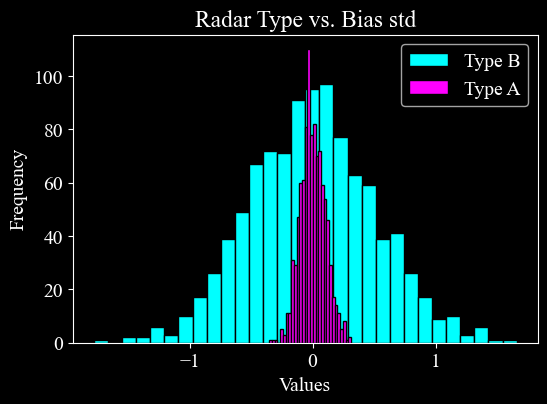

In [ ]:
import c4dynamics as c4d 
from c4dynamics.sensors import seeker
import matplotlib.pyplot as plt
import os 


# del radars_type_A, radars_type_B

radars_type_A = []
radars_type_B = []
B_std = 0.5 * c4d.d2r

for i in range(1000):
  radars_type_A.append(seeker().bias * c4d.r2d)
  radars_type_B.append(seeker(bias_std = B_std).bias * c4d.r2d)




# Plot the histogram
plt.hist(radars_type_B, color = 'cyan', bins = 30, edgecolor = 'black', label = 'Type B') #, alpha=0.1, label='Histogram 2')
plt.hist(radars_type_A, color = 'magenta', bins = 30, edgecolor = 'black', label = 'Type A')  

plt.title('Radar Type vs. Bias std')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
# # Show the plot

# plt.tight_layout()

plt.savefig(os.path.join(os.getcwd()
              , 'docs/source/_static/figures/seeker_bias.png')
                , dpi = 150
                    , bbox_inches = 'tight')

plt.show()




## scale factor 

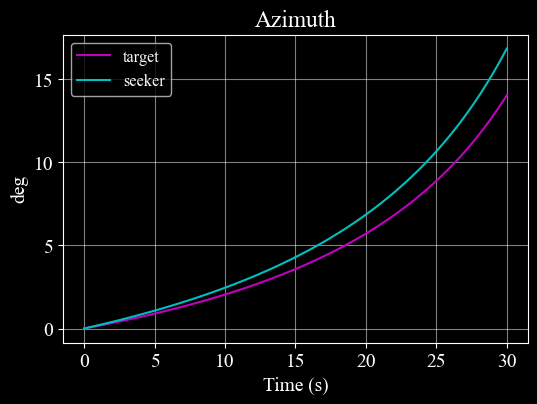

In [ ]:
import c4dynamics as c4d 
from c4dynamics.sensors import seeker
import matplotlib.pyplot as plt
import os 
import numpy as np 

dt = .01
time = np.arange(0, 30, dt)

''' generate target trajectory '''


tgt = c4d.datapoint(x = 1000, y = 0, vx = -80 * c4d.kmh2ms, vy = 10 * c4d.kmh2ms)


seeker_sf = 1.2

skr = seeker(bias_std = 0, noise_std = 0)
skr.scale_factor = seeker_sf

for t in time:
    tgt.inteqm(np.zeros(3), dt)
    skr.measure(tgt, store = True, t = t)  
    tgt.store(t)

plt.plot(tgt.get_data('t'), c4d.atan(tgt.get_data('y') / tgt.get_data('x')) * c4d.r2d, 'm', label = 'target')
plt.plot(tgt.get_data('t'), skr.get_data('az')[:, 1] *  c4d.r2d, 'c', label = 'seeker')

plt.title('Azimuth')
plt.xlabel('Time (s)')
plt.ylabel('deg')
plt.grid(alpha = .5)
plt.legend(fontsize = 'small')


plt.savefig(os.path.join(os.getcwd()
              , 'docs/source/_static/figures/seeker_sf.png')
                , dpi = 150
                    , bbox_inches = 'tight')

plt.show()




## measure

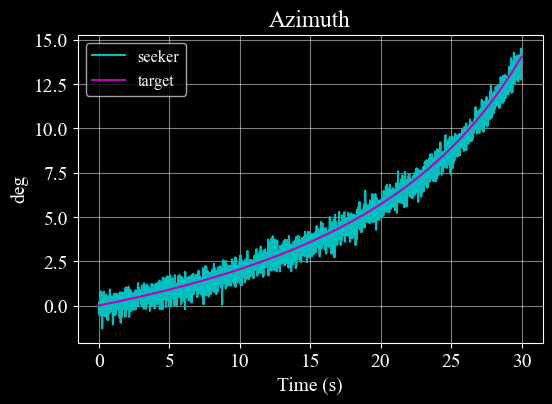

In [ ]:
import c4dynamics as c4d 
from c4dynamics.sensors import seeker
import matplotlib.pyplot as plt
import os 
import numpy as np 

dt = .01
time = np.arange(0, 30, dt)


tgt = c4d.datapoint(x = 1000, y = 0, vx = -80 * c4d.kmh2ms, vy = 10 * c4d.kmh2ms)

skr = seeker()

for t in time:
    tgt.inteqm(np.zeros(3), dt)
    skr.measure(tgt, store = True, t = t)  
    tgt.store(t)



plt.plot(tgt.get_data('t'), skr.get_data('az')[:, 1] *  c4d.r2d, 'c', label = 'seeker')
plt.plot(tgt.get_data('t'), c4d.atan(tgt.get_data('y') / tgt.get_data('x')) * c4d.r2d, 'm', label = 'target')

plt.title('Azimuth')
plt.xlabel('Time (s)')
plt.ylabel('deg')
plt.grid(alpha = .5)
plt.legend(fontsize = 'small')


plt.savefig(os.path.join(os.getcwd()
              , 'docs/source/_static/figures/seeker_measure.png')
                , dpi = 150
                    , bbox_inches = 'tight')

plt.show()



